In [226]:
import pandas as pd
import numpy as np

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [228]:
df_train = pd.read_csv('titanic_train.csv')

In [229]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [230]:
df_train['Fare'].mean()

32.2042079685746

In [231]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


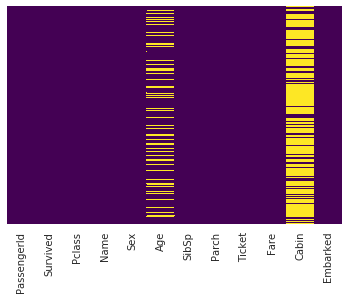

In [232]:
##existem alguns campos que são NaN, vamos tratar isso antes de mais nada
##cbar é a barra de cores que tem no heatmap
##usar um mapa de calor para saber quais são as variáveis que tem NaN é muito legal!
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [233]:
sns.set_style('whitegrid')

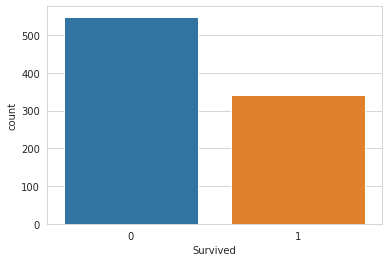

In [234]:
sns.countplot(x='Survived', data=df_train)

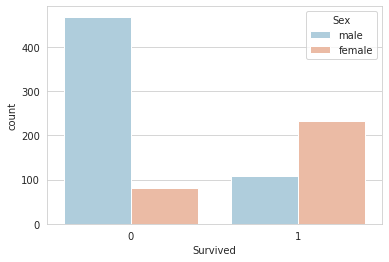

In [235]:
##com o parâmetro hue, que a maior quantidade de pessoas que sobreviveram são mulheres
sns.countplot(x='Survived', data=df_train, hue='Sex', palette='RdBu_r')

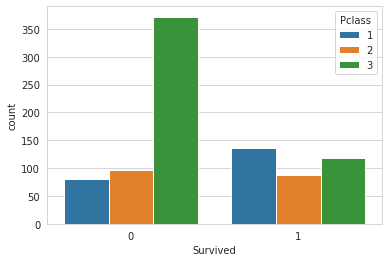

In [236]:
## é importante fazer essas análises, isso me dará parâmetro para saber o quanto o meu modelo foi bem contruído, 
## não só pelas métricas de acurácia, precisão, recall e etc, preciso entender como os dados se relacionam, inter-
##preta-os

sns.countplot(x='Survived', data=df_train, hue='Pclass')

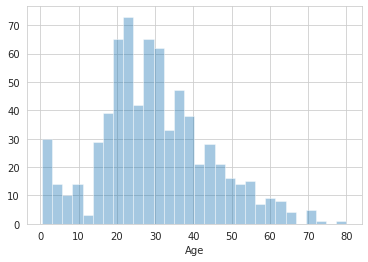

In [237]:
## Vamos ver o quanto a idade influencia 
## o que esse gráfico me motra?
sns.distplot(df_train['Age'].dropna(), kde=False, bins=30)

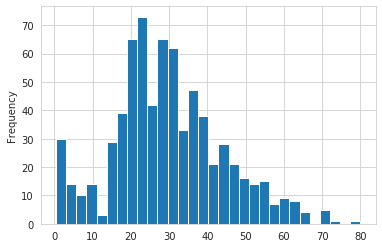

In [238]:
df_train['Age'].plot.hist(bins=30)

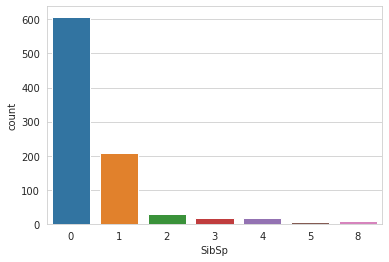

In [239]:
sns.countplot(x='SibSp', data=df_train)

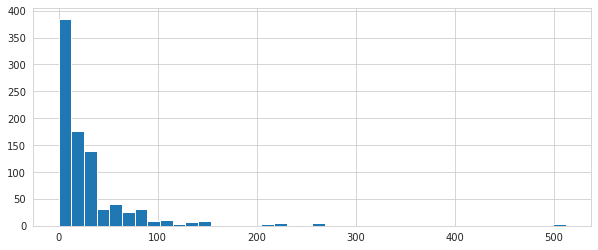

In [240]:
df_train['Fare'].hist(bins=40, figsize=(10,4))

In [241]:
import cufflinks as cf

cf.go_offline()

In [242]:
##df_train['Fare'].iplot(kind='hist', bins=40)

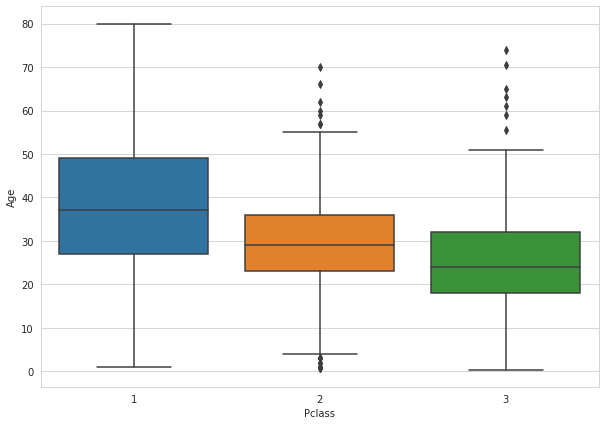

In [243]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df_train)

In [244]:
def imput_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 29
        else: return 24
    else:
        return age
##df_train.fillna(method=np.mean , value='NaN')

In [245]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(imput_age, axis =1)

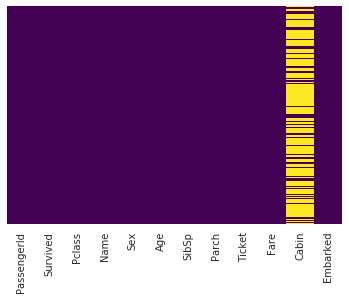

In [246]:
##cbar booleano que constroi ou não a barra de cores, no nosso caso apenas estamos plotando se é null ou não.
##yticklabels. Se verdeiro, plota o no das colunas do dataframe, se falso não plota, se auto, tenta plotar
##densamente sem sobre rótulos
##cmap:(matplotlib colormap name or object, or list of colors, optional)
##o mapeamento dos valores de dados para o espaço de cores, se não fornecido, o padrão dependerá se o centro 
##está definido
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [247]:
df_train.drop('Cabin', axis=1 ,inplace=True)

In [248]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [249]:
df_train.dropna(inplace=True)

In [250]:
##até aqui apenas analisamos os dados platados para sabermos quais podem ser possíveis variáveis úteis e 
##limpamos os dados que estavam nulos
##agora temos que transformar as minhas variáveis categóricas em variáveis numéricas, os algoritimos de ML não 
## tratar isso como variavéis categóricas.

## para fazer uma conversão de variável categórica podemos usar o seguinte método:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)
##o retorno é um dataframe com as duas categorias

embarked = pd.get_dummies(df_train['Embarked'], drop_first=True)

df_train = pd.concat([df_train, sex, embarked], axis=1)


In [251]:
df_train.drop(['Name' ,'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [252]:
df_train.drop('PassengerId', axis=1, inplace=True)

In [253]:
df_train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [254]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
lg = LogisticRegression()

In [259]:
lg.fit(X_train, y_train)

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
y_pred = lg.predict(X_test)

In [261]:
from sklearn.metrics import classification_report

In [262]:
##estouprevendo se a pessoa vai sobreviver ou não

##vamos olhar se ele irá sobreviver; a precisão(0.84) nesse caso é maior que o RACALL(0.70)
##isso significa que o false negativo tem mais peso
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [263]:
from sklearn.metrics import confusion_matrix

In [264]:
confusion_array =confusion_matrix(y_test, y_pred)
print(confusion_array)

[[149  14]
 [ 31  73]]


In [265]:
from sklearn.metrics import plot_confusion_matrix

In [266]:
##plot_confusion_matrix(lg,X_test,y_test)

In [267]:
## precisão: falso positivo
## recall: falso negativo
## falso positivo é maior que o falso negativo
## a quantidade de FP (Falso positivo) é maior e isso torna o valor de recall menor
## a quantidade de FN (Falso negativo) é menor e isso torna o valor de precisão maior
##nesse caso qual é métrica que eu deveria me atentar mais? na minha visão é a precisão (falso positivo)
## porque é preciso ser mais realista, se o modelo previu como sobreviveu e na verdade não (FP) e bem pior

In [268]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    print(cm.max())
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 73  31]
 [ 14 149]]


Confusion matrix, without normalization
[[ 73  31]
 [ 14 149]]
149


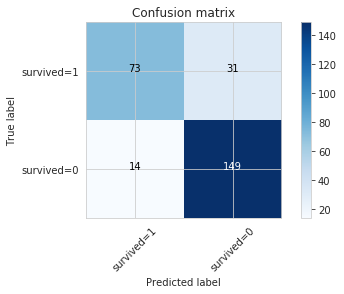

In [269]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived=1','survived=0'],normalize= False, title='Confusion matrix')

In [270]:
##estouprevendo se a pessoa vai sobreviver ou não

##vamos olhar se ele irá sobreviver; a precisão(0.84) nesse caso é maior que o RACALL(0.70)
##isso significa que o false negativo tem mais peso
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [271]:
## Algo que faltou é o log log
from sklearn.metrics import log_loss

In [272]:
## para normalize: se verdadeiro, retorna a média de perda por amostra, senão retorna a soma de perdas por amostra
## se a perda é muito grande significa que ada ponto tem baixa probabilidade da pessoa ser classificado na classe
## verdadeira no caso ele ter sobrevivido ao titanic
log_loss(y_test, y_pred)

5.821184015486905

In [273]:
y_pr = lg.predict_proba(X_test)
loss = log_loss(y_test, y_pr)
print('Log loss proba ', loss)

Log loss proba  0.42852216831549356


In [274]:
from sklearn.metrics import jaccard_similarity_score

In [275]:
## o indíce de similaridade de jaccard 
jaccard_similarity_score(y_test, y_pred)

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



0.8314606741573034